# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.9.0'

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

Metal device set to: Apple M1


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13421710772952175365
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 locality {
   bus_id: 1
 }
 incarnation: 13630640911828960558
 physical_device_desc: "device: 0, name: METAL, pci bus id: <undefined>"
 xla_global_id: -1]

## Part 1 - Data Preprocessing (데이터 전처리)

### Preprocessing the Training set

- 한 번에 훈련하면 중간에 오류나고 느려서 6개로 폴더 나눠서 가져옴
- 정확도가 너무 안 나와서 7가지 감정 중 불안과 상처를 제외하고 훈련

In [24]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range = 7,
                                  horizontal_flip=True)

training_set_list = []
for i in range(1, 7):
    training_set2 = train_datagen.flow_from_directory('한국인 감정인식을 위한 복합 영상/Training' + str(i),
                                                     target_size = (64, 64),
                                                     batch_size = 7,
                                                     class_mode = 'categorical',
                                                     #shuffle=True,
                                                     subset='training')
    training_set_list.append(training_set2)

Found 4248 images belonging to 5 classes.
Found 4250 images belonging to 5 classes.
Found 4266 images belonging to 5 classes.
Found 4245 images belonging to 5 classes.
Found 4250 images belonging to 5 classes.
Found 4250 images belonging to 5 classes.


In [6]:
import numpy as np

for i in range(6):
    print(np.unique(training_set_list[i].classes, return_counts=True))

(array([0, 1, 2, 3, 4], dtype=int32), array([849, 850, 850, 849, 850]))
(array([0, 1, 2, 3, 4], dtype=int32), array([850, 850, 850, 850, 850]))
(array([0, 1, 2, 3, 4], dtype=int32), array([868, 850, 850, 849, 849]))
(array([0, 1, 2, 3, 4], dtype=int32), array([846, 850, 849, 850, 850]))
(array([0, 1, 2, 3, 4], dtype=int32), array([850, 850, 850, 850, 850]))
(array([0, 1, 2, 3, 4], dtype=int32), array([850, 850, 850, 850, 850]))


In [7]:
for i in range(6):
    print(training_set_list[i].class_indices)

{'기쁨': 0, '당황': 1, '분노': 2, '슬픔': 3, '중립': 4}
{'기쁨': 0, '당황': 1, '분노': 2, '슬픔': 3, '중립': 4}
{'기쁨': 0, '당황': 1, '분노': 2, '슬픔': 3, '중립': 4}
{'기쁨': 0, '당황': 1, '분노': 2, '슬픔': 3, '중립': 4}
{'기쁨': 0, '당황': 1, '분노': 2, '슬픔': 3, '중립': 4}
{'기쁨': 0, '당황': 1, '분노': 2, '슬픔': 3, '중립': 4}


### Preprocessing the Test set

In [69]:
# 이미지 증강 도구를 쓰지 않음 / 원본처럼 온전하게 유지 대신 픽셀의 크기는 조정
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('한국인 감정인식을 위한 복합 영상/Valid',
                                            target_size = (64, 64),
                                            batch_size = 1,
                                            class_mode = 'categorical',
                                            #subset="validation",
                                            shuffle=False)

Found 4000 images belonging to 5 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [9]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [10]:
# 컨볼루션 레이어 필터 32개
# kernel_size 3x3 차원
# 활성화 함수 : 정류화 (relu)
# 이미지 크기 64, 64 / 색깔 컬러(3), 흑백(1)
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,
                               activation='relu', input_shape=(64, 64, 3)))
cnn.add(tf.keras.layers.BatchNormalization())

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())

### Step 2 - Pooling

In [12]:
# 풀링 프레임 사이즈 2x2
# 이동할 픽셀 수 : 2
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.2)) # 과적합일 때 씀

### Adding a second convolutional layer

In [13]:
# 처음으로 추가할 때만 input_size 필요함
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.2))

### Adding a third convolutional layer

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.2))

### Step 3 - Flattening

In [15]:
# 1차원 벡터 값으로 펼치기
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [16]:
# 뉴런 개수 : 64
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
#cnn.add(tf.keras.layers.Dropout(0.2))

In [17]:
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
#cnn.add(tf.keras.layers.Dropout(0.2))

### Step 5 - Output Layer

In [18]:
cnn.add(tf.keras.layers.Dense(units=5, activation='softmax'))

In [19]:
# 구조 점검
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 60, 60, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                      

## Part 3 - Training the CNN

### Compiling the CNN

In [20]:
# 옵티마이저 확률적 경사 하강법
# 손실 함수 이진 교차 엔트로피
# merics 다중으로 할 수 있음
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

과적합 방지를 위해 6개 폴더 번갈아가면서 훈련

In [21]:
cnn.fit(training_set_list[0], epochs = 50)

Epoch 1/50


2023-07-03 22:25:57.282889: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


607/607 [==============================] - 447s 728ms/step - loss: 1.8173 - accuracy: 0.2079
Epoch 2/50
607/607 [==============================] - 224s 369ms/step - loss: 1.6905 - accuracy: 0.1928
Epoch 3/50
607/607 [==============================] - 225s 370ms/step - loss: 1.6529 - accuracy: 0.1996
Epoch 4/50
607/607 [==============================] - 225s 370ms/step - loss: 1.6395 - accuracy: 0.2121
Epoch 5/50
607/607 [==============================] - 225s 370ms/step - loss: 1.6309 - accuracy: 0.2050
Epoch 6/50
607/607 [==============================] - 225s 370ms/step - loss: 1.6294 - accuracy: 0.2032
Epoch 7/50
607/607 [==============================] - 226s 372ms/step - loss: 1.6215 - accuracy: 0.2192
Epoch 8/50
607/607 [==============================] - 225s 371ms/step - loss: 1.6246 - accuracy: 0.2142
Epoch 9/50
607/607 [==============================] - 225s 371ms/step - loss: 1.6253 - accuracy: 0.1999
Epoch 10/50
607/607 [==============================] - 225s 371ms/step - lo

In [29]:
cnn.fit(training_set_list[1], epochs = 50)

Epoch 1/50
292/608 [=============>................] - ETA: 1:54 - loss: 1.6073 - accuracy: 0.2115

2023-07-04 13:47:40.017927: W tensorflow/core/framework/op_kernel.cc:1733] UNKNOWN: OSError: broken data stream when reading image file
Traceback (most recent call last):

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 1030, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/keras/engine/data_adapter.py", line 831, in wrapped_generator
    for data in generator_fn():

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/keras/engine/data_adapter.py", line 957, in generator_fn
   

UnknownError: Graph execution error:

2 root error(s) found.
  (0) UNKNOWN:  OSError: broken data stream when reading image file
Traceback (most recent call last):

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 1030, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/keras/engine/data_adapter.py", line 831, in wrapped_generator
    for data in generator_fn():

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/keras/engine/data_adapter.py", line 957, in generator_fn
    yield x[i]

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/keras/preprocessing/image.py", line 110, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/keras/preprocessing/image.py", line 337, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/keras/utils/image_utils.py", line 443, in load_img
    img = img.resize(width_height_tuple, resample)

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/PIL/Image.py", line 2156, in resize
    self.load()

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/PIL/ImageFile.py", line 288, in load
    raise_oserror(err_code)

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/PIL/ImageFile.py", line 72, in raise_oserror
    raise OSError(msg)

OSError: broken data stream when reading image file


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_10]]
  (1) UNKNOWN:  OSError: broken data stream when reading image file
Traceback (most recent call last):

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/tensorflow/python/data/ops/dataset_ops.py", line 1030, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/keras/engine/data_adapter.py", line 831, in wrapped_generator
    for data in generator_fn():

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/keras/engine/data_adapter.py", line 957, in generator_fn
    yield x[i]

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/keras/preprocessing/image.py", line 110, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/keras/preprocessing/image.py", line 337, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/keras/utils/image_utils.py", line 443, in load_img
    img = img.resize(width_height_tuple, resample)

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/PIL/Image.py", line 2156, in resize
    self.load()

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/PIL/ImageFile.py", line 288, in load
    raise_oserror(err_code)

  File "/Users/chosy/anaconda3/envs/newbie/lib/python3.8/site-packages/PIL/ImageFile.py", line 72, in raise_oserror
    raise OSError(msg)

OSError: broken data stream when reading image file


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_2596]

In [30]:
cnn.fit(training_set_list[2], epochs = 50)

Epoch 1/50
610/610 [==============================] - 3774s 6s/step - loss: 1.6121 - accuracy: 0.1932
Epoch 2/50
610/610 [==============================] - 217s 355ms/step - loss: 1.6077 - accuracy: 0.2199
Epoch 3/50
610/610 [==============================] - 218s 358ms/step - loss: 1.6082 - accuracy: 0.2110
Epoch 4/50
610/610 [==============================] - 219s 359ms/step - loss: 1.6077 - accuracy: 0.2168
Epoch 5/50
610/610 [==============================] - 219s 359ms/step - loss: 1.6079 - accuracy: 0.2185
Epoch 6/50
610/610 [==============================] - 219s 359ms/step - loss: 1.6069 - accuracy: 0.2201
Epoch 7/50
610/610 [==============================] - 219s 360ms/step - loss: 1.6078 - accuracy: 0.2138
Epoch 8/50
610/610 [==============================] - 219s 360ms/step - loss: 1.6091 - accuracy: 0.2133
Epoch 9/50
610/610 [==============================] - 219s 360ms/step - loss: 1.6055 - accuracy: 0.2152
Epoch 10/50
610/610 [==============================] - 219s 359ms/

In [31]:
cnn.fit(training_set_list[3], epochs = 50)

Epoch 1/50
607/607 [==============================] - 3946s 7s/step - loss: 1.4544 - accuracy: 0.3515
Epoch 2/50
607/607 [==============================] - 219s 361ms/step - loss: 1.4228 - accuracy: 0.3800
Epoch 3/50
607/607 [==============================] - 220s 362ms/step - loss: 1.4531 - accuracy: 0.3642
Epoch 4/50
607/607 [==============================] - 221s 364ms/step - loss: 1.4157 - accuracy: 0.3840
Epoch 5/50
607/607 [==============================] - 221s 364ms/step - loss: 1.3809 - accuracy: 0.4019
Epoch 6/50
607/607 [==============================] - 221s 365ms/step - loss: 1.3595 - accuracy: 0.4174
Epoch 7/50
607/607 [==============================] - 221s 365ms/step - loss: 1.3669 - accuracy: 0.4165
Epoch 8/50
607/607 [==============================] - 222s 365ms/step - loss: 1.3420 - accuracy: 0.4148
Epoch 9/50
462/607 [=====================>........] - ETA: 53s - loss: 1.3585 - accuracy: 0.4149

In [ ]:
cnn.fit(training_set_list[0], epochs = 50)

In [ ]:
cnn.fit(training_set_list[1], epochs = 50)

In [ ]:
cnn.fit(training_set_list[2], epochs = 50)

In [30]:
cnn.fit(training_set_list[3], epochs = 15)

Epoch 1/15
607/607 [==============================] - 222s 367ms/step - loss: 1.3965 - accuracy: 0.3922
Epoch 2/15
607/607 [==============================] - 222s 366ms/step - loss: 1.3413 - accuracy: 0.4231
Epoch 3/15
607/607 [==============================] - 222s 366ms/step - loss: 1.3349 - accuracy: 0.4231
Epoch 4/15
607/607 [==============================] - 222s 365ms/step - loss: 1.3096 - accuracy: 0.4337
Epoch 5/15
607/607 [==============================] - 222s 365ms/step - loss: 1.2979 - accuracy: 0.4471
Epoch 6/15
607/607 [==============================] - 222s 366ms/step - loss: 1.3034 - accuracy: 0.4485
Epoch 7/15
607/607 [==============================] - 222s 366ms/step - loss: 1.2589 - accuracy: 0.4653
Epoch 8/15
607/607 [==============================] - 222s 366ms/step - loss: 1.2446 - accuracy: 0.4770
Epoch 9/15
607/607 [==============================] - 222s 366ms/step - loss: 1.2498 - accuracy: 0.4808
Epoch 10/15
607/607 [==============================] - 222s 367m

In [31]:
cnn.fit(training_set_list[4], epochs = 15)

Epoch 1/15
608/608 [==============================] - 223s 367ms/step - loss: 1.3527 - accuracy: 0.4278
Epoch 2/15
608/608 [==============================] - 223s 367ms/step - loss: 1.3139 - accuracy: 0.4511
Epoch 3/15
608/608 [==============================] - 223s 367ms/step - loss: 1.2795 - accuracy: 0.4687
Epoch 4/15
608/608 [==============================] - 223s 367ms/step - loss: 1.2714 - accuracy: 0.4685
Epoch 5/15
608/608 [==============================] - 223s 367ms/step - loss: 1.2403 - accuracy: 0.4746
Epoch 6/15
608/608 [==============================] - 223s 367ms/step - loss: 1.2363 - accuracy: 0.4861
Epoch 7/15
608/608 [==============================] - 223s 367ms/step - loss: 1.2128 - accuracy: 0.4981
Epoch 8/15
608/608 [==============================] - 225s 371ms/step - loss: 1.1951 - accuracy: 0.5035
Epoch 9/15
608/608 [==============================] - 223s 367ms/step - loss: 1.2083 - accuracy: 0.5014
Epoch 10/15
608/608 [==============================] - 223s 367m

In [32]:
cnn.fit(training_set_list[0], epochs = 15)

Epoch 1/15
607/607 [==============================] - 225s 371ms/step - loss: 1.3237 - accuracy: 0.4356
Epoch 2/15
607/607 [==============================] - 224s 369ms/step - loss: 1.2719 - accuracy: 0.4693
Epoch 3/15
607/607 [==============================] - 224s 370ms/step - loss: 1.2431 - accuracy: 0.4865
Epoch 4/15
607/607 [==============================] - 225s 371ms/step - loss: 1.2246 - accuracy: 0.4914
Epoch 5/15
607/607 [==============================] - 225s 371ms/step - loss: 1.2113 - accuracy: 0.5013
Epoch 6/15
607/607 [==============================] - 225s 371ms/step - loss: 1.1787 - accuracy: 0.5208
Epoch 7/15
607/607 [==============================] - 225s 371ms/step - loss: 1.1672 - accuracy: 0.5215
Epoch 8/15
607/607 [==============================] - 225s 371ms/step - loss: 1.1678 - accuracy: 0.5189
Epoch 9/15
607/607 [==============================] - 225s 371ms/step - loss: 1.1244 - accuracy: 0.5401
Epoch 10/15
607/607 [==============================] - 225s 370m

In [33]:
cnn.fit(training_set_list[1], epochs = 15)

Epoch 1/15
607/607 [==============================] - 224s 369ms/step - loss: 1.2790 - accuracy: 0.4669
Epoch 2/15
607/607 [==============================] - 224s 369ms/step - loss: 1.2239 - accuracy: 0.4989
Epoch 3/15
607/607 [==============================] - 224s 369ms/step - loss: 1.2018 - accuracy: 0.5013
Epoch 4/15
607/607 [==============================] - 224s 368ms/step - loss: 1.1750 - accuracy: 0.5201
Epoch 5/15
607/607 [==============================] - 224s 368ms/step - loss: 1.1713 - accuracy: 0.5248
Epoch 6/15
607/607 [==============================] - 224s 368ms/step - loss: 1.1296 - accuracy: 0.5406
Epoch 7/15
607/607 [==============================] - 224s 368ms/step - loss: 1.1171 - accuracy: 0.5491
Epoch 8/15
607/607 [==============================] - 224s 368ms/step - loss: 1.1033 - accuracy: 0.5521
Epoch 9/15
607/607 [==============================] - 224s 368ms/step - loss: 1.0803 - accuracy: 0.5660
Epoch 10/15
607/607 [==============================] - 224s 369m

In [34]:
cnn.fit(training_set_list[2], epochs = 15)

Epoch 1/15
610/610 [==============================] - 221s 361ms/step - loss: 1.2343 - accuracy: 0.4816
Epoch 2/15
610/610 [==============================] - 221s 362ms/step - loss: 1.1897 - accuracy: 0.5128
Epoch 3/15
610/610 [==============================] - 221s 362ms/step - loss: 1.1530 - accuracy: 0.5203
Epoch 4/15
610/610 [==============================] - 221s 362ms/step - loss: 1.1245 - accuracy: 0.5465
Epoch 5/15
610/610 [==============================] - 221s 362ms/step - loss: 1.1032 - accuracy: 0.5484
Epoch 6/15
610/610 [==============================] - 221s 362ms/step - loss: 1.0980 - accuracy: 0.5531
Epoch 7/15
610/610 [==============================] - 221s 362ms/step - loss: 1.0552 - accuracy: 0.5746
Epoch 8/15
610/610 [==============================] - 221s 362ms/step - loss: 1.0333 - accuracy: 0.5864
Epoch 9/15
610/610 [==============================] - 221s 362ms/step - loss: 1.0269 - accuracy: 0.5850
Epoch 10/15
610/610 [==============================] - 221s 362m

In [35]:
cnn.fit(training_set_list[3], epochs = 15)

Epoch 1/15
607/607 [==============================] - 222s 366ms/step - loss: 1.2220 - accuracy: 0.5001
Epoch 2/15
607/607 [==============================] - 222s 366ms/step - loss: 1.1486 - accuracy: 0.5343
Epoch 3/15
607/607 [==============================] - 222s 366ms/step - loss: 1.0884 - accuracy: 0.5600
Epoch 4/15
607/607 [==============================] - 222s 366ms/step - loss: 1.0915 - accuracy: 0.5595
Epoch 5/15
607/607 [==============================] - 222s 366ms/step - loss: 1.0669 - accuracy: 0.5786
Epoch 6/15
607/607 [==============================] - 223s 367ms/step - loss: 1.0416 - accuracy: 0.5870
Epoch 7/15
607/607 [==============================] - 222s 366ms/step - loss: 1.0204 - accuracy: 0.5965
Epoch 8/15
607/607 [==============================] - 222s 366ms/step - loss: 1.0206 - accuracy: 0.5974
Epoch 9/15
607/607 [==============================] - 222s 366ms/step - loss: 0.9956 - accuracy: 0.6087
Epoch 10/15
607/607 [==============================] - 222s 366m

In [36]:
cnn.fit(training_set_list[4], epochs = 15)

Epoch 1/15
608/608 [==============================] - 223s 367ms/step - loss: 1.1824 - accuracy: 0.5327
Epoch 2/15
608/608 [==============================] - 223s 366ms/step - loss: 1.1216 - accuracy: 0.5407
Epoch 3/15
608/608 [==============================] - 223s 367ms/step - loss: 1.0842 - accuracy: 0.5687
Epoch 4/15
608/608 [==============================] - 223s 367ms/step - loss: 1.0708 - accuracy: 0.5784
Epoch 5/15
608/608 [==============================] - 223s 367ms/step - loss: 1.0121 - accuracy: 0.6014
Epoch 6/15
608/608 [==============================] - 223s 367ms/step - loss: 1.0171 - accuracy: 0.6024
Epoch 7/15
608/608 [==============================] - 223s 367ms/step - loss: 0.9993 - accuracy: 0.6087
Epoch 8/15
608/608 [==============================] - 223s 367ms/step - loss: 0.9484 - accuracy: 0.6358
Epoch 9/15
608/608 [==============================] - 223s 367ms/step - loss: 0.9568 - accuracy: 0.6266
Epoch 10/15
608/608 [==============================] - 223s 367m

In [37]:
cnn.fit(training_set_list[0], epochs = 10)

Epoch 1/10
607/607 [==============================] - 225s 370ms/step - loss: 1.1507 - accuracy: 0.5458
Epoch 2/10
607/607 [==============================] - 225s 370ms/step - loss: 1.0930 - accuracy: 0.5677
Epoch 3/10
607/607 [==============================] - 225s 370ms/step - loss: 1.0430 - accuracy: 0.5914
Epoch 4/10
607/607 [==============================] - 224s 370ms/step - loss: 1.0167 - accuracy: 0.5917
Epoch 5/10
607/607 [==============================] - 224s 370ms/step - loss: 1.0159 - accuracy: 0.5928
Epoch 6/10
607/607 [==============================] - 225s 370ms/step - loss: 0.9861 - accuracy: 0.6145
Epoch 7/10
607/607 [==============================] - 224s 370ms/step - loss: 0.9752 - accuracy: 0.6274
Epoch 8/10
607/607 [==============================] - 224s 370ms/step - loss: 0.9351 - accuracy: 0.6392
Epoch 9/10
607/607 [==============================] - 224s 370ms/step - loss: 0.9238 - accuracy: 0.6439
Epoch 10/10
607/607 [==============================] - 224s 370m

In [38]:
cnn.fit(training_set_list[1], epochs = 10)

Epoch 1/10
607/607 [==============================] - 224s 369ms/step - loss: 1.1139 - accuracy: 0.5510
Epoch 2/10
607/607 [==============================] - 224s 369ms/step - loss: 1.0617 - accuracy: 0.5806
Epoch 3/10
607/607 [==============================] - 224s 369ms/step - loss: 1.0595 - accuracy: 0.5771
Epoch 4/10
607/607 [==============================] - 224s 369ms/step - loss: 1.0076 - accuracy: 0.6048
Epoch 5/10
607/607 [==============================] - 224s 369ms/step - loss: 0.9702 - accuracy: 0.6152
Epoch 6/10
607/607 [==============================] - 224s 368ms/step - loss: 0.9597 - accuracy: 0.6171
Epoch 7/10
607/607 [==============================] - 224s 369ms/step - loss: 0.9298 - accuracy: 0.6439
Epoch 8/10
607/607 [==============================] - 224s 369ms/step - loss: 0.9347 - accuracy: 0.6406
Epoch 9/10
607/607 [==============================] - 226s 372ms/step - loss: 0.8996 - accuracy: 0.6578
Epoch 10/10
607/607 [==============================] - 224s 370m

In [39]:
cnn.fit(training_set_list[2], epochs = 10)

Epoch 1/10
610/610 [==============================] - 224s 367ms/step - loss: 1.0789 - accuracy: 0.5772
Epoch 2/10
610/610 [==============================] - 222s 364ms/step - loss: 1.0252 - accuracy: 0.5887
Epoch 3/10
610/610 [==============================] - 222s 363ms/step - loss: 0.9836 - accuracy: 0.6046
Epoch 4/10
610/610 [==============================] - 222s 363ms/step - loss: 0.9260 - accuracy: 0.6278
Epoch 5/10
610/610 [==============================] - 222s 363ms/step - loss: 0.9014 - accuracy: 0.6457
Epoch 6/10
610/610 [==============================] - 222s 363ms/step - loss: 0.8890 - accuracy: 0.6499
Epoch 7/10
610/610 [==============================] - 222s 364ms/step - loss: 0.8557 - accuracy: 0.6667
Epoch 8/10
610/610 [==============================] - 222s 364ms/step - loss: 0.8511 - accuracy: 0.6665
Epoch 9/10
610/610 [==============================] - 222s 363ms/step - loss: 0.8227 - accuracy: 0.6860
Epoch 10/10
610/610 [==============================] - 222s 363m

In [40]:
cnn.fit(training_set_list[3], epochs = 10)

Epoch 1/10
607/607 [==============================] - 223s 368ms/step - loss: 1.0780 - accuracy: 0.5788
Epoch 2/10
607/607 [==============================] - 223s 368ms/step - loss: 0.9999 - accuracy: 0.6087
Epoch 3/10
607/607 [==============================] - 223s 367ms/step - loss: 0.9567 - accuracy: 0.6250
Epoch 4/10
607/607 [==============================] - 223s 366ms/step - loss: 0.9538 - accuracy: 0.6264
Epoch 5/10
607/607 [==============================] - 223s 367ms/step - loss: 0.8982 - accuracy: 0.6462
Epoch 6/10
607/607 [==============================] - 223s 367ms/step - loss: 0.8901 - accuracy: 0.6544
Epoch 7/10
607/607 [==============================] - 223s 367ms/step - loss: 0.8579 - accuracy: 0.6624
Epoch 8/10
607/607 [==============================] - 223s 367ms/step - loss: 0.8473 - accuracy: 0.6676
Epoch 9/10
607/607 [==============================] - 223s 367ms/step - loss: 0.8357 - accuracy: 0.6721
Epoch 10/10
607/607 [==============================] - 223s 367m

In [41]:
cnn.fit(training_set_list[4], epochs = 10)

Epoch 1/10
608/608 [==============================] - 223s 367ms/step - loss: 1.0460 - accuracy: 0.5772
Epoch 2/10
608/608 [==============================] - 223s 367ms/step - loss: 0.9469 - accuracy: 0.6322
Epoch 3/10
608/608 [==============================] - 223s 367ms/step - loss: 0.9244 - accuracy: 0.6409
Epoch 4/10
608/608 [==============================] - 223s 367ms/step - loss: 0.9124 - accuracy: 0.6494
Epoch 5/10
608/608 [==============================] - 223s 367ms/step - loss: 0.8804 - accuracy: 0.6614
Epoch 6/10
608/608 [==============================] - 223s 367ms/step - loss: 0.8468 - accuracy: 0.6692
Epoch 7/10
608/608 [==============================] - 223s 367ms/step - loss: 0.8185 - accuracy: 0.6814
Epoch 8/10
608/608 [==============================] - 223s 367ms/step - loss: 0.8094 - accuracy: 0.6882
Epoch 9/10
608/608 [==============================] - 223s 367ms/step - loss: 0.7746 - accuracy: 0.7134
Epoch 10/10
608/608 [==============================] - 224s 368m

In [42]:
cnn.fit(training_set_list[0], epochs = 10)

Epoch 1/10
607/607 [==============================] - 224s 369ms/step - loss: 1.0464 - accuracy: 0.5914
Epoch 2/10
607/607 [==============================] - 225s 370ms/step - loss: 0.9743 - accuracy: 0.6178
Epoch 3/10
607/607 [==============================] - 224s 370ms/step - loss: 0.9283 - accuracy: 0.6385
Epoch 4/10
607/607 [==============================] - 224s 370ms/step - loss: 0.9124 - accuracy: 0.6559
Epoch 5/10
607/607 [==============================] - 224s 370ms/step - loss: 0.8613 - accuracy: 0.6726
Epoch 6/10
607/607 [==============================] - 224s 370ms/step - loss: 0.8699 - accuracy: 0.6594
Epoch 7/10
607/607 [==============================] - 225s 371ms/step - loss: 0.8209 - accuracy: 0.6858
Epoch 8/10
607/607 [==============================] - 225s 370ms/step - loss: 0.7957 - accuracy: 0.6978
Epoch 9/10
607/607 [==============================] - 224s 370ms/step - loss: 0.7643 - accuracy: 0.7115
Epoch 10/10
607/607 [==============================] - 228s 375m

In [43]:
cnn.fit(training_set_list[1], epochs = 10)

Epoch 1/10
607/607 [==============================] - 225s 370ms/step - loss: 1.0322 - accuracy: 0.5985
Epoch 2/10
607/607 [==============================] - 224s 369ms/step - loss: 0.9457 - accuracy: 0.6289
Epoch 3/10
607/607 [==============================] - 224s 369ms/step - loss: 0.9253 - accuracy: 0.6387
Epoch 4/10
607/607 [==============================] - 224s 369ms/step - loss: 0.8831 - accuracy: 0.6554
Epoch 5/10
607/607 [==============================] - 224s 369ms/step - loss: 0.8573 - accuracy: 0.6696
Epoch 6/10
607/607 [==============================] - 224s 369ms/step - loss: 0.8278 - accuracy: 0.6809
Epoch 7/10
607/607 [==============================] - 224s 369ms/step - loss: 0.8036 - accuracy: 0.6966
Epoch 8/10
607/607 [==============================] - 224s 369ms/step - loss: 0.7789 - accuracy: 0.6995
Epoch 9/10
607/607 [==============================] - 224s 369ms/step - loss: 0.7652 - accuracy: 0.7124
Epoch 10/10
607/607 [==============================] - 224s 369m

In [44]:
cnn.fit(training_set_list[2], epochs = 10)

Epoch 1/10
610/610 [==============================] - 221s 363ms/step - loss: 0.9871 - accuracy: 0.6140
Epoch 2/10
610/610 [==============================] - 221s 362ms/step - loss: 0.8941 - accuracy: 0.6424
Epoch 3/10
610/610 [==============================] - 221s 362ms/step - loss: 0.8646 - accuracy: 0.6621
Epoch 4/10
610/610 [==============================] - 222s 364ms/step - loss: 0.8317 - accuracy: 0.6876
Epoch 5/10
610/610 [==============================] - 222s 363ms/step - loss: 0.7819 - accuracy: 0.6956
Epoch 6/10
610/610 [==============================] - 222s 363ms/step - loss: 0.7732 - accuracy: 0.6977
Epoch 7/10
610/610 [==============================] - 222s 363ms/step - loss: 0.7522 - accuracy: 0.7136
Epoch 8/10
610/610 [==============================] - 222s 363ms/step - loss: 0.7306 - accuracy: 0.7249
Epoch 9/10
610/610 [==============================] - 222s 363ms/step - loss: 0.7210 - accuracy: 0.7225
Epoch 10/10
610/610 [==============================] - 222s 363m

In [45]:
cnn.fit(training_set_list[3], epochs = 10)

Epoch 1/10
607/607 [==============================] - 223s 367ms/step - loss: 0.9921 - accuracy: 0.6186
Epoch 2/10
607/607 [==============================] - 223s 367ms/step - loss: 0.9395 - accuracy: 0.6351
Epoch 3/10
607/607 [==============================] - 223s 367ms/step - loss: 0.9082 - accuracy: 0.6375
Epoch 4/10
607/607 [==============================] - 222s 366ms/step - loss: 0.8471 - accuracy: 0.6700
Epoch 5/10
607/607 [==============================] - 223s 367ms/step - loss: 0.8206 - accuracy: 0.6862
Epoch 6/10
607/607 [==============================] - 223s 367ms/step - loss: 0.8148 - accuracy: 0.6902
Epoch 7/10
607/607 [==============================] - 223s 367ms/step - loss: 0.7717 - accuracy: 0.7013
Epoch 8/10
607/607 [==============================] - 223s 367ms/step - loss: 0.7383 - accuracy: 0.7206
Epoch 9/10
607/607 [==============================] - 223s 367ms/step - loss: 0.7087 - accuracy: 0.7279
Epoch 10/10
607/607 [==============================] - 223s 367m

In [46]:
cnn.fit(training_set_list[4], epochs = 10)

Epoch 1/10
608/608 [==============================] - 223s 367ms/step - loss: 0.9535 - accuracy: 0.6296
Epoch 2/10
608/608 [==============================] - 224s 368ms/step - loss: 0.8819 - accuracy: 0.6569
Epoch 3/10
608/608 [==============================] - 223s 367ms/step - loss: 0.8357 - accuracy: 0.6765
Epoch 4/10
608/608 [==============================] - 223s 367ms/step - loss: 0.7634 - accuracy: 0.7038
Epoch 5/10
608/608 [==============================] - 224s 368ms/step - loss: 0.7601 - accuracy: 0.7082
Epoch 6/10
608/608 [==============================] - 224s 368ms/step - loss: 0.7410 - accuracy: 0.7202
Epoch 7/10
608/608 [==============================] - 224s 368ms/step - loss: 0.7052 - accuracy: 0.7414
Epoch 8/10
608/608 [==============================] - 224s 368ms/step - loss: 0.6762 - accuracy: 0.7459
Epoch 9/10
608/608 [==============================] - 223s 368ms/step - loss: 0.6643 - accuracy: 0.7591
Epoch 10/10
608/608 [==============================] - 224s 368m

In [47]:
cnn.fit(training_set_list[0], epochs = 10)

Epoch 1/10
607/607 [==============================] - 225s 370ms/step - loss: 0.9885 - accuracy: 0.6284
Epoch 2/10
607/607 [==============================] - 225s 370ms/step - loss: 0.9285 - accuracy: 0.6385
Epoch 3/10
607/607 [==============================] - 225s 370ms/step - loss: 0.8431 - accuracy: 0.6764
Epoch 4/10
607/607 [==============================] - 225s 370ms/step - loss: 0.8161 - accuracy: 0.6908
Epoch 5/10
607/607 [==============================] - 225s 371ms/step - loss: 0.8072 - accuracy: 0.6910
Epoch 6/10
607/607 [==============================] - 225s 371ms/step - loss: 0.7487 - accuracy: 0.7223
Epoch 7/10
607/607 [==============================] - 225s 370ms/step - loss: 0.7520 - accuracy: 0.7124
Epoch 8/10
607/607 [==============================] - 225s 370ms/step - loss: 0.7545 - accuracy: 0.7119
Epoch 9/10
607/607 [==============================] - 227s 373ms/step - loss: 0.7267 - accuracy: 0.7244
Epoch 10/10
607/607 [==============================] - 225s 371m

In [48]:
cnn.fit(training_set_list[1], epochs = 10)

Epoch 1/10
607/607 [==============================] - 225s 370ms/step - loss: 0.9713 - accuracy: 0.6317
Epoch 2/10
607/607 [==============================] - 224s 369ms/step - loss: 0.8968 - accuracy: 0.6507
Epoch 3/10
607/607 [==============================] - 225s 370ms/step - loss: 0.8617 - accuracy: 0.6693
Epoch 4/10
607/607 [==============================] - 225s 370ms/step - loss: 0.8342 - accuracy: 0.6795
Epoch 5/10
607/607 [==============================] - 224s 369ms/step - loss: 0.7899 - accuracy: 0.6997
Epoch 6/10
607/607 [==============================] - 224s 369ms/step - loss: 0.7624 - accuracy: 0.7152
Epoch 7/10
607/607 [==============================] - 224s 369ms/step - loss: 0.7261 - accuracy: 0.7195
Epoch 8/10
607/607 [==============================] - 224s 369ms/step - loss: 0.7393 - accuracy: 0.7159
Epoch 9/10
607/607 [==============================] - 224s 369ms/step - loss: 0.6982 - accuracy: 0.7437
Epoch 10/10
607/607 [==============================] - 224s 369m

In [49]:
cnn.fit(training_set_list[2], epochs = 10)

Epoch 1/10
610/610 [==============================] - 221s 363ms/step - loss: 0.9074 - accuracy: 0.6585
Epoch 2/10
610/610 [==============================] - 221s 363ms/step - loss: 0.8424 - accuracy: 0.6733
Epoch 3/10
610/610 [==============================] - 223s 365ms/step - loss: 0.8131 - accuracy: 0.6841
Epoch 4/10
610/610 [==============================] - 222s 364ms/step - loss: 0.7425 - accuracy: 0.7136
Epoch 5/10
610/610 [==============================] - 222s 364ms/step - loss: 0.7091 - accuracy: 0.7387
Epoch 6/10
610/610 [==============================] - 222s 363ms/step - loss: 0.6974 - accuracy: 0.7345
Epoch 7/10
610/610 [==============================] - 222s 364ms/step - loss: 0.6658 - accuracy: 0.7446
Epoch 8/10
610/610 [==============================] - 222s 364ms/step - loss: 0.6612 - accuracy: 0.7457
Epoch 9/10
610/610 [==============================] - 222s 364ms/step - loss: 0.6138 - accuracy: 0.7762
Epoch 10/10
610/610 [==============================] - 222s 364m

In [50]:
cnn.fit(training_set_list[3], epochs = 10)

Epoch 1/10
607/607 [==============================] - 223s 367ms/step - loss: 0.9263 - accuracy: 0.6464
Epoch 2/10
607/607 [==============================] - 223s 367ms/step - loss: 0.8657 - accuracy: 0.6655
Epoch 3/10
607/607 [==============================] - 223s 367ms/step - loss: 0.8175 - accuracy: 0.6749
Epoch 4/10
607/607 [==============================] - 223s 367ms/step - loss: 0.7637 - accuracy: 0.7062
Epoch 5/10
607/607 [==============================] - 223s 367ms/step - loss: 0.7296 - accuracy: 0.7234
Epoch 6/10
607/607 [==============================] - 223s 367ms/step - loss: 0.7164 - accuracy: 0.7331
Epoch 7/10
607/607 [==============================] - 223s 367ms/step - loss: 0.7043 - accuracy: 0.7425
Epoch 8/10
607/607 [==============================] - 223s 367ms/step - loss: 0.6640 - accuracy: 0.7461
Epoch 9/10
607/607 [==============================] - 223s 368ms/step - loss: 0.6562 - accuracy: 0.7543
Epoch 10/10
607/607 [==============================] - 224s 369m

In [51]:
cnn.fit(training_set_list[4], epochs = 10)

Epoch 1/10
608/608 [==============================] - 228s 375ms/step - loss: 0.9099 - accuracy: 0.6511
Epoch 2/10
608/608 [==============================] - 224s 369ms/step - loss: 0.8108 - accuracy: 0.6871
Epoch 3/10
608/608 [==============================] - 225s 369ms/step - loss: 0.7675 - accuracy: 0.7080
Epoch 4/10
608/608 [==============================] - 224s 368ms/step - loss: 0.7504 - accuracy: 0.7198
Epoch 5/10
608/608 [==============================] - 224s 368ms/step - loss: 0.6974 - accuracy: 0.7369
Epoch 6/10
608/608 [==============================] - 224s 368ms/step - loss: 0.7002 - accuracy: 0.7384
Epoch 7/10
608/608 [==============================] - 224s 368ms/step - loss: 0.6686 - accuracy: 0.7506
Epoch 8/10
608/608 [==============================] - 224s 368ms/step - loss: 0.6368 - accuracy: 0.7532
Epoch 9/10
608/608 [==============================] - 223s 368ms/step - loss: 0.6133 - accuracy: 0.7725
Epoch 10/10
608/608 [==============================] - 223s 367m

In [82]:
cnn.fit(training_set_list[0], epochs = 10)

Epoch 1/10
607/607 [==============================] - 224s 369ms/step - loss: 0.9034 - accuracy: 0.6522
Epoch 2/10
607/607 [==============================] - 225s 371ms/step - loss: 0.8308 - accuracy: 0.6809
Epoch 3/10
607/607 [==============================] - 225s 370ms/step - loss: 0.9000 - accuracy: 0.6625
Epoch 4/10
607/607 [==============================] - 225s 370ms/step - loss: 0.8232 - accuracy: 0.6900
Epoch 5/10
607/607 [==============================] - 224s 369ms/step - loss: 0.7841 - accuracy: 0.7075
Epoch 6/10
607/607 [==============================] - 225s 371ms/step - loss: 0.7750 - accuracy: 0.7117
Epoch 7/10
607/607 [==============================] - 225s 371ms/step - loss: 0.7224 - accuracy: 0.7218
Epoch 8/10
607/607 [==============================] - 225s 370ms/step - loss: 0.6957 - accuracy: 0.7322
Epoch 9/10
607/607 [==============================] - 225s 370ms/step - loss: 0.6708 - accuracy: 0.7421
Epoch 10/10
607/607 [==============================] - 225s 370m

In [83]:
cnn.fit(training_set_list[1], epochs = 10)

Epoch 1/10
607/607 [==============================] - 224s 369ms/step - loss: 0.8830 - accuracy: 0.6604
Epoch 2/10
607/607 [==============================] - 224s 369ms/step - loss: 0.8138 - accuracy: 0.6870
Epoch 3/10
607/607 [==============================] - 224s 369ms/step - loss: 0.7513 - accuracy: 0.7183
Epoch 4/10
607/607 [==============================] - 224s 369ms/step - loss: 0.7326 - accuracy: 0.7197
Epoch 5/10
607/607 [==============================] - 224s 369ms/step - loss: 0.6960 - accuracy: 0.7312
Epoch 6/10
607/607 [==============================] - 224s 369ms/step - loss: 0.6653 - accuracy: 0.7505
Epoch 7/10
607/607 [==============================] - 224s 369ms/step - loss: 0.6420 - accuracy: 0.7618
Epoch 8/10
607/607 [==============================] - 224s 368ms/step - loss: 0.6103 - accuracy: 0.7684
Epoch 9/10
607/607 [==============================] - 224s 369ms/step - loss: 0.6048 - accuracy: 0.7743
Epoch 10/10
607/607 [==============================] - 225s 370m

In [84]:
cnn.fit(training_set_list[2], epochs = 10)

Epoch 1/10
610/610 [==============================] - 222s 363ms/step - loss: 0.8492 - accuracy: 0.6771
Epoch 2/10
610/610 [==============================] - 223s 365ms/step - loss: 0.7571 - accuracy: 0.7101
Epoch 3/10
610/610 [==============================] - 222s 364ms/step - loss: 0.7160 - accuracy: 0.7300
Epoch 4/10
610/610 [==============================] - 222s 364ms/step - loss: 0.6730 - accuracy: 0.7481
Epoch 5/10
610/610 [==============================] - 222s 364ms/step - loss: 0.6591 - accuracy: 0.7553
Epoch 6/10
610/610 [==============================] - 220s 360ms/step - loss: 0.6183 - accuracy: 0.7689
Epoch 7/10
610/610 [==============================] - 222s 364ms/step - loss: 0.5873 - accuracy: 0.7874
Epoch 8/10
610/610 [==============================] - 222s 364ms/step - loss: 0.5684 - accuracy: 0.7938
Epoch 9/10
610/610 [==============================] - 222s 363ms/step - loss: 0.5372 - accuracy: 0.7968
Epoch 10/10
610/610 [==============================] - 223s 366m

In [85]:
cnn.fit(training_set_list[3], epochs = 10)

Epoch 1/10
607/607 [==============================] - 223s 367ms/step - loss: 0.8845 - accuracy: 0.6688
Epoch 2/10
607/607 [==============================] - 223s 367ms/step - loss: 0.7574 - accuracy: 0.7088
Epoch 3/10
607/607 [==============================] - 223s 367ms/step - loss: 0.7018 - accuracy: 0.7322
Epoch 4/10
607/607 [==============================] - 223s 367ms/step - loss: 0.6818 - accuracy: 0.7406
Epoch 5/10
607/607 [==============================] - 223s 367ms/step - loss: 0.6815 - accuracy: 0.7432
Epoch 6/10
607/607 [==============================] - 223s 368ms/step - loss: 0.6291 - accuracy: 0.7569
Epoch 7/10
607/607 [==============================] - 223s 367ms/step - loss: 0.6131 - accuracy: 0.7746
Epoch 8/10
607/607 [==============================] - 223s 368ms/step - loss: 0.5815 - accuracy: 0.7842
Epoch 9/10
607/607 [==============================] - 223s 367ms/step - loss: 0.5651 - accuracy: 0.7932
Epoch 10/10
607/607 [==============================] - 223s 368m

In [86]:
cnn.fit(training_set_list[4], epochs = 10)

Epoch 1/10
608/608 [==============================] - 224s 368ms/step - loss: 0.8319 - accuracy: 0.6887
Epoch 2/10
608/608 [==============================] - 224s 369ms/step - loss: 0.7462 - accuracy: 0.7207
Epoch 3/10
608/608 [==============================] - 224s 368ms/step - loss: 0.6965 - accuracy: 0.7393
Epoch 4/10
608/608 [==============================] - 224s 368ms/step - loss: 0.6672 - accuracy: 0.7501
Epoch 5/10
608/608 [==============================] - 224s 369ms/step - loss: 0.6157 - accuracy: 0.7708
Epoch 6/10
608/608 [==============================] - 224s 368ms/step - loss: 0.5853 - accuracy: 0.7791
Epoch 7/10
608/608 [==============================] - 224s 368ms/step - loss: 0.5630 - accuracy: 0.7979
Epoch 8/10
608/608 [==============================] - 224s 368ms/step - loss: 0.5420 - accuracy: 0.7967
Epoch 9/10
608/608 [==============================] - 224s 368ms/step - loss: 0.5419 - accuracy: 0.8005
Epoch 10/10
608/608 [==============================] - 224s 368m

## Saving and loading the model

In [87]:
model_json = cnn.to_json()
with open('seventhAI/faceFeelingAI7_56.json', 'w') as json_file:
    json_file.write(model_json)

In [88]:
from keras.models import save_model
network_saved = save_model(cnn, 'seventhAI/weights7_56.hdf5')

### Load model

In [89]:
with open('seventhAI/faceFeelingAI7_56.json', 'r') as json_file:
    json_saved_model = json_file.read()
# json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 64, 64, 3], "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "BatchNormalization", "config": {"name": "batch_normalization", "trainable": true, "dtype": "float32", "axis": [3], "momentum": 0.99, "epsilon": 0.001, "

In [90]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('seventhAI/weights7_56.hdf5')
network_loaded.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [91]:
network_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 60, 60, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                        

## Evaluating the neural network

### sixthAI

In [ ]:
network_loaded.evaluate(test_set)

56% 정확도

In [92]:
predictions = network_loaded.predict(test_set)
predictions

4000/4000 [==============================] - 212s 53ms/step


array([[9.77074564e-01, 1.57284189e-03, 2.78651059e-05, 3.83859361e-03,
        1.74861252e-02],
       [8.27148616e-01, 7.03807091e-05, 6.00560680e-02, 1.03166118e-01,
        9.55882668e-03],
       [9.98303890e-01, 7.11582034e-05, 2.76111707e-04, 9.20651073e-04,
        4.28174360e-04],
       ...,
       [1.09631708e-06, 1.45320356e-01, 3.32101434e-02, 9.77207255e-03,
        8.11696351e-01],
       [5.62858884e-04, 7.52903000e-02, 3.49852033e-02, 4.58054960e-01,
        4.31106687e-01],
       [6.17757053e-07, 1.25808390e-02, 1.19464576e-01, 8.09133887e-01,
        5.88201769e-02]], dtype=float32)

In [93]:
predictions = np.argmax(predictions, axis=1)
predictions

array([0, 0, 0, ..., 4, 3, 3])

In [94]:
test_set.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(test_set.classes, predictions)

0.5655

In [96]:
test_set.class_indices

{'기쁨': 0, '당황': 1, '분노': 2, '슬픔': 3, '중립': 4}

In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_set.classes, predictions)
cm

array([[665,  20,  36,  50,  29],
       [ 39, 437,  82, 106, 136],
       [ 85,  94, 370, 121, 130],
       [ 73,  75, 121, 311, 220],
       [ 33,  57,  92, 139, 479]])

In [98]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

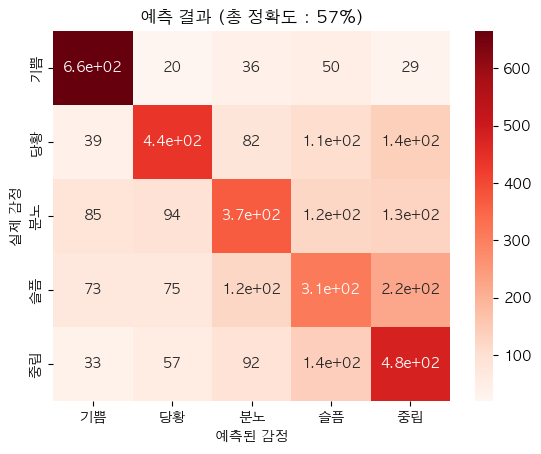

In [100]:
import seaborn as sns

sns.heatmap(cm, annot=True, xticklabels=['기쁨', '당황', '분노', '슬픔', '중립'], yticklabels=['기쁨', '당황', '분노', '슬픔', '중립'], cmap="Reds")
plt.title('예측 결과 (총 정확도 : 57%)')
plt.xlabel('예측된 감정')
plt.ylabel('실제 감정')
plt.show()

In [ ]:
import seaborn as sns

sns.heatmap(cm, annot=True)

In [101]:
print(np.unique(test_set.classes, return_counts=True))

(array([0, 1, 2, 3, 4], dtype=int32), array([800, 800, 800, 800, 800]))


In [102]:
from sklearn.metrics import classification_report
print(classification_report(test_set.classes, predictions))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78       800
           1       0.64      0.55      0.59       800
           2       0.53      0.46      0.49       800
           3       0.43      0.39      0.41       800
           4       0.48      0.60      0.53       800

    accuracy                           0.57      4000
   macro avg       0.56      0.57      0.56      4000
weighted avg       0.56      0.57      0.56      4000

